# Exercise 5: Python REPL Tool for Financial Analysis
## Advanced Financial Calculations and Data Visualization

In this notebook, we'll learn how to use the PythonREPLTool to perform complex financial calculations and create visualizations. This powerful tool allows agents to execute Python code dynamically for advanced analysis.

## Learning Objectives
- Master the PythonREPLTool for dynamic code execution
- Perform complex financial calculations using Python libraries
- Create data visualizations for portfolio performance
- Handle tool outputs and parse results
- Build interactive financial analysis systems
- Combine code execution with LangChain agents

Let's dive into advanced financial analysis with Python! 🐍📊

## Setup and Imports

First, let's install and import all the necessary libraries for financial analysis and visualization.

In [1]:
# Install required packages
!uv add langchain langchain-openai langchain-experimental python-dotenv pandas numpy matplotlib seaborn plotly yfinance

Resolved 392 packages in 3.26s==11.1                                 
   Building peewee==3.18.1                                             ⠋ Preparing packages... (0/0)                                                   
   Building peewee==3.18.1                                     
⠙ Preparing packages... (0/9)
   Building peewee==3.18.1--------     0 B/313.54 KiB          
⠙ Preparing packages... (0/9)
   Building peewee==3.18.1-------- 14.91 KiB/313.54 KiB        
⠙ Preparing packages... (0/9)
   Building peewee==3.18.1-------- 14.91 KiB/313.54 KiB        
⠙ Preparing packages... (0/9)
protobuf             ------------------------------ 14.91 KiB/313.54 KiB
   Building peewee==3.18.1--------     0 B/9.19 MiB            
⠙ Preparing packages... (0/9)
protobuf             ------------------------------ 14.91 KiB/313.54 KiB
   Building peewee==3.18.1--------     0 B/9.19 MiB            
⠙ Preparing packages... (0/9)
protobuf             ------------------------------ 14.91 KiB/313.54

In [2]:
# Import necessary libraries
from langchain_experimental.tools import PythonREPLTool
from langchain.tools import Tool
from langchain_openai import ChatOpenAI
from langchain.agents import initialize_agent, AgentType
from langchain.schema import SystemMessage
import os
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from datetime import datetime, timedelta
import json
import warnings
warnings.filterwarnings('ignore')

# Load environment variables
load_dotenv()

# Initialize ChatOpenAI
llm = ChatOpenAI(
    model="gpt-3.5-turbo",
    temperature=0.1,
    api_key=os.getenv("OPENAI_API_KEY")
)

# Create Python REPL tool
python_repl = PythonREPLTool()

print("✓ Setup complete!")
print("✓ Python REPL tool ready!")
print("✓ Financial analysis libraries imported!")

✓ Setup complete!
✓ Python REPL tool ready!
✓ Financial analysis libraries imported!


## Part 1: Understanding PythonREPLTool

Let's start by understanding how the PythonREPLTool works and what it can do for financial analysis.

In [3]:
# Basic usage of PythonREPLTool
print("=== Testing Basic PythonREPLTool Usage ===")

# Simple calculation
result1 = python_repl.run("2 + 2")
print(f"Basic calculation: {result1}")

# More complex calculation
result2 = python_repl.run("""
import math
principal = 10000
rate = 0.07
years = 10
compound_amount = principal * (1 + rate) ** years
print(f"Compound interest calculation: ${compound_amount:,.2f}")
""")
print(f"Financial calculation: {result2}")

# Create a simple list and analyze it
result3 = python_repl.run("""
monthly_returns = [0.02, -0.01, 0.03, 0.01, -0.02, 0.04, 0.02, -0.01, 0.03, 0.01, 0.02, 0.01]
avg_return = sum(monthly_returns) / len(monthly_returns)
annual_return = (1 + avg_return) ** 12 - 1
print(f"Average monthly return: {avg_return:.4f}")
print(f"Annualized return: {annual_return:.4f}")
""")
print(f"Return analysis: {result3}")

print("✓ PythonREPLTool basic functionality demonstrated!")

Python REPL can execute arbitrary code. Use with caution.


=== Testing Basic PythonREPLTool Usage ===
Basic calculation: 
Financial calculation: Compound interest calculation: $19,671.51

Return analysis: Average monthly return: 0.0125
Annualized return: 0.1608

✓ PythonREPLTool basic functionality demonstrated!


## Part 2: Financial Data Generation and Analysis

Let's create mock financial data and perform comprehensive analysis using the Python REPL tool.

In [4]:
# Generate comprehensive financial data using Python REPL
print("=== Generating Financial Data ===")

financial_data_code = """
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Generate mock stock data for multiple companies
companies = ['AAPL', 'GOOGL', 'MSFT', 'TSLA', 'AMZN']
start_date = datetime(2023, 1, 1)
end_date = datetime(2024, 12, 31)

# Create date range
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Generate stock data
stock_data = {}
for company in companies:
    # Starting price
    if company == 'AAPL':
        start_price = 150
    elif company == 'GOOGL':
        start_price = 100
    elif company == 'MSFT':
        start_price = 250
    elif company == 'TSLA':
        start_price = 200
    else:  # AMZN
        start_price = 120
    
    # Generate price series with random walk
    prices = [start_price]
    for i in range(1, len(date_range)):
        # Random daily return between -5% and +5%
        daily_return = np.random.normal(0.001, 0.02)  # Slight positive bias
        new_price = prices[-1] * (1 + daily_return)
        prices.append(max(new_price, 1))  # Ensure price doesn't go below $1
    
    stock_data[company] = {
        'Date': date_range,
        'Price': prices,
        'Volume': np.random.randint(1000000, 10000000, len(date_range))
    }

# Create DataFrame
df_list = []
for company, data in stock_data.items():
    df_temp = pd.DataFrame({
        'Date': data['Date'],
        'Symbol': company,
        'Price': data['Price'],
        'Volume': data['Volume']
    })
    df_list.append(df_temp)

df = pd.concat(df_list, ignore_index=True)
print(f"Generated {len(df)} data points for {len(companies)} companies")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print("\\nSample data:")
print(df.head(10))
"""

result = python_repl.run(financial_data_code)
print(result)

=== Generating Financial Data ===
Generated 3655 data points for 5 companies
Date range: 2023-01-01 00:00:00 to 2024-12-31 00:00:00

Sample data:
        Date Symbol       Price   Volume
0 2023-01-01   AAPL  150.000000  2014929
1 2023-01-02   AAPL  151.640142  3420564
2 2023-01-03   AAPL  151.372454  9577064
3 2023-01-04   AAPL  153.484671  3653093
4 2023-01-05   AAPL  158.313390  4303457
5 2023-01-06   AAPL  157.730311  6888997
6 2023-01-07   AAPL  157.149432  7944121
7 2023-01-08   AAPL  162.270029  7238795
8 2023-01-09   AAPL  164.922932  5767348
9 2023-01-10   AAPL  163.539313  1716756



## Part 3: Portfolio Performance Analysis

Now let's create a comprehensive portfolio analysis tool using the Python REPL.

In [5]:
# Portfolio analysis code
print("=== Portfolio Performance Analysis ===")

portfolio_analysis_code = """
# Define portfolio holdings
portfolio = {
    'AAPL': 100,   # 100 shares
    'GOOGL': 50,   # 50 shares
    'MSFT': 75,    # 75 shares
    'TSLA': 25,    # 25 shares
    'AMZN': 60     # 60 shares
}

# Calculate portfolio value over time
portfolio_values = []
dates = []

for date in df['Date'].unique():
    daily_data = df[df['Date'] == date]
    daily_value = 0
    
    for symbol, shares in portfolio.items():
        stock_price = daily_data[daily_data['Symbol'] == symbol]['Price'].iloc[0]
        daily_value += stock_price * shares
    
    portfolio_values.append(daily_value)
    dates.append(date)

# Create portfolio DataFrame
portfolio_df = pd.DataFrame({
    'Date': dates,
    'Portfolio_Value': portfolio_values
})

# Calculate portfolio metrics
initial_value = portfolio_values[0]
final_value = portfolio_values[-1]
total_return = (final_value - initial_value) / initial_value
days = len(portfolio_values)
annualized_return = (final_value / initial_value) ** (365 / days) - 1

# Calculate daily returns
portfolio_df['Daily_Return'] = portfolio_df['Portfolio_Value'].pct_change()
portfolio_df['Cumulative_Return'] = (portfolio_df['Portfolio_Value'] / initial_value) - 1

# Calculate volatility (standard deviation of daily returns)
volatility = portfolio_df['Daily_Return'].std() * np.sqrt(252)  # Annualized volatility

# Calculate max drawdown
portfolio_df['Running_Max'] = portfolio_df['Portfolio_Value'].cummax()
portfolio_df['Drawdown'] = (portfolio_df['Portfolio_Value'] - portfolio_df['Running_Max']) / portfolio_df['Running_Max']
max_drawdown = portfolio_df['Drawdown'].min()

# Calculate Sharpe ratio (assuming risk-free rate of 2%)
risk_free_rate = 0.02
excess_return = annualized_return - risk_free_rate
sharpe_ratio = excess_return / volatility if volatility != 0 else 0

print("📊 PORTFOLIO PERFORMANCE METRICS")
print("=" * 50)
print(f"Initial Portfolio Value: ${initial_value:,.2f}")
print(f"Final Portfolio Value: ${final_value:,.2f}")
print(f"Total Return: {total_return:.2%}")
print(f"Annualized Return: {annualized_return:.2%}")
print(f"Volatility (Annual): {volatility:.2%}")
print(f"Max Drawdown: {max_drawdown:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Analysis Period: {days} days")
"""

result = python_repl.run(portfolio_analysis_code)
print(result)

=== Portfolio Performance Analysis ===
📊 PORTFOLIO PERFORMANCE METRICS
Initial Portfolio Value: $50,950.00
Final Portfolio Value: $104,847.68
Total Return: 105.79%
Annualized Return: 43.38%
Volatility (Annual): 18.06%
Max Drawdown: -24.05%
Sharpe Ratio: 2.29
Analysis Period: 731 days



## Part 4: Creating Visualizations

Let's create compelling visualizations to represent our financial analysis using matplotlib and plotly.

=== Creating Portfolio Visualizations ===


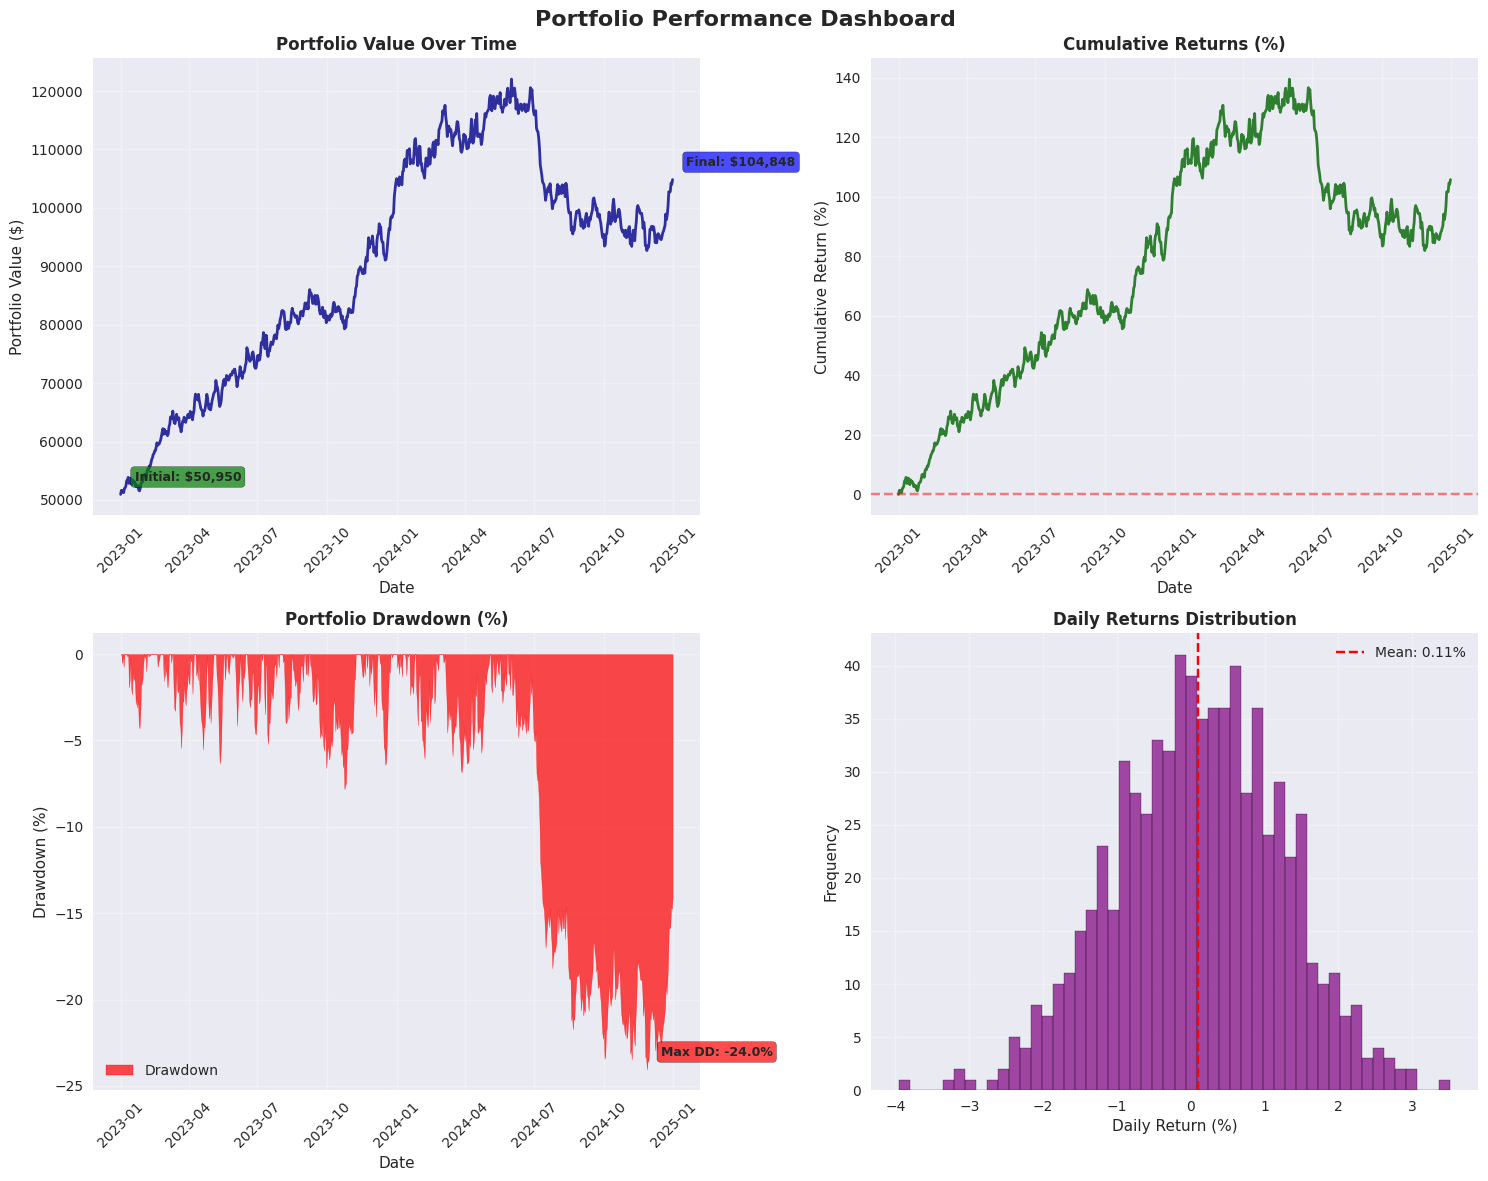

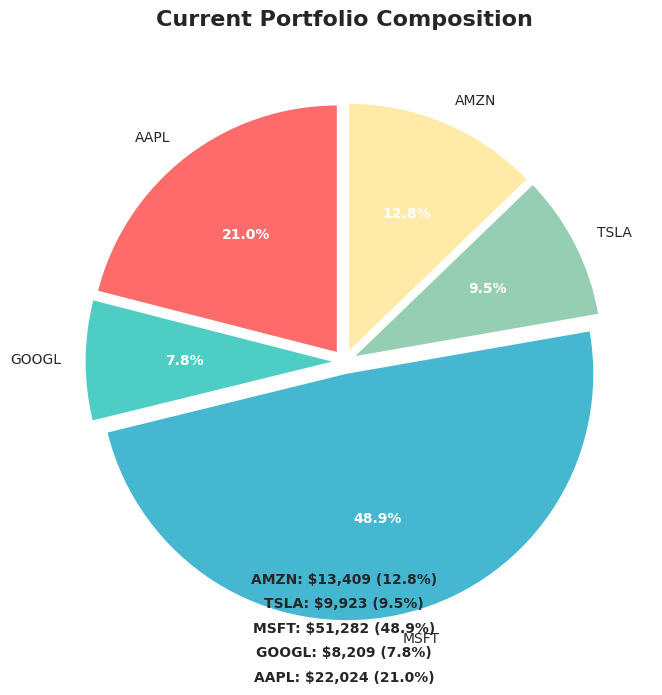

✓ Portfolio visualizations created successfully!



In [6]:
# Create portfolio visualization
print("=== Creating Portfolio Visualizations ===")

visualization_code = """
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')

# Create a comprehensive dashboard
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Portfolio Performance Dashboard', fontsize=16, fontweight='bold')

# 1. Portfolio Value Over Time
axes[0, 0].plot(portfolio_df['Date'], portfolio_df['Portfolio_Value'], 
                linewidth=2, color='darkblue', alpha=0.8)
axes[0, 0].set_title('Portfolio Value Over Time', fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Portfolio Value ($)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# Add initial and final value annotations
axes[0, 0].annotate(f'Initial: ${initial_value:,.0f}', 
                   xy=(portfolio_df['Date'].iloc[0], initial_value),
                   xytext=(10, 10), textcoords='offset points',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='green', alpha=0.7),
                   fontsize=9, fontweight='bold')

axes[0, 0].annotate(f'Final: ${final_value:,.0f}', 
                   xy=(portfolio_df['Date'].iloc[-1], final_value),
                   xytext=(10, 10), textcoords='offset points',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='blue', alpha=0.7),
                   fontsize=9, fontweight='bold')

# 2. Cumulative Returns
axes[0, 1].plot(portfolio_df['Date'], portfolio_df['Cumulative_Return'] * 100, 
                linewidth=2, color='darkgreen', alpha=0.8)
axes[0, 1].set_title('Cumulative Returns (%)', fontweight='bold')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Cumulative Return (%)')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5)

# 3. Drawdown Analysis
axes[1, 0].fill_between(portfolio_df['Date'], portfolio_df['Drawdown'] * 100, 0, 
                        alpha=0.7, color='red', label='Drawdown')
axes[1, 0].set_title('Portfolio Drawdown (%)', fontweight='bold')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Drawdown (%)')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend()

# Add max drawdown annotation
max_dd_date = portfolio_df.loc[portfolio_df['Drawdown'].idxmin(), 'Date']
max_dd_value = max_drawdown * 100
axes[1, 0].annotate(f'Max DD: {max_dd_value:.1f}%', 
                   xy=(max_dd_date, max_dd_value),
                   xytext=(10, 10), textcoords='offset points',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='red', alpha=0.7),
                   fontsize=9, fontweight='bold')

# 4. Daily Returns Distribution
daily_returns_clean = portfolio_df['Daily_Return'].dropna() * 100
axes[1, 1].hist(daily_returns_clean, bins=50, alpha=0.7, color='purple', edgecolor='black')
axes[1, 1].set_title('Daily Returns Distribution', fontweight='bold')
axes[1, 1].set_xlabel('Daily Return (%)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axvline(x=daily_returns_clean.mean(), color='red', linestyle='--', 
                   label=f'Mean: {daily_returns_clean.mean():.2f}%')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Portfolio composition pie chart
fig2, ax = plt.subplots(figsize=(10, 8))

# Calculate current portfolio weights
current_weights = {}
latest_date = df['Date'].max()
latest_data = df[df['Date'] == latest_date]

total_portfolio_value = 0
for symbol, shares in portfolio.items():
    stock_price = latest_data[latest_data['Symbol'] == symbol]['Price'].iloc[0]
    position_value = stock_price * shares
    current_weights[symbol] = position_value
    total_portfolio_value += position_value

# Convert to percentages
weight_percentages = {k: (v/total_portfolio_value)*100 for k, v in current_weights.items()}

# Create pie chart
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
wedges, texts, autotexts = ax.pie(weight_percentages.values(), 
                                  labels=weight_percentages.keys(),
                                  autopct='%1.1f%%',
                                  colors=colors,
                                  startangle=90,
                                  explode=(0.05, 0.05, 0.05, 0.05, 0.05))

# Beautify the pie chart
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

ax.set_title('Current Portfolio Composition', fontsize=16, fontweight='bold', pad=20)

# Add value labels
for i, (symbol, percentage) in enumerate(weight_percentages.items()):
    value = current_weights[symbol]
    ax.text(0, -1.3 + i*0.1, f'{symbol}: ${value:,.0f} ({percentage:.1f}%)', 
            ha='center', fontsize=10, fontweight='bold')

plt.show()

print("✓ Portfolio visualizations created successfully!")
"""

result = python_repl.run(visualization_code)
print(result)

## Part 5: Interactive Stock Price Comparison

Let's create an interactive comparison tool for analyzing individual stock performance.

=== Stock Performance Comparison ===


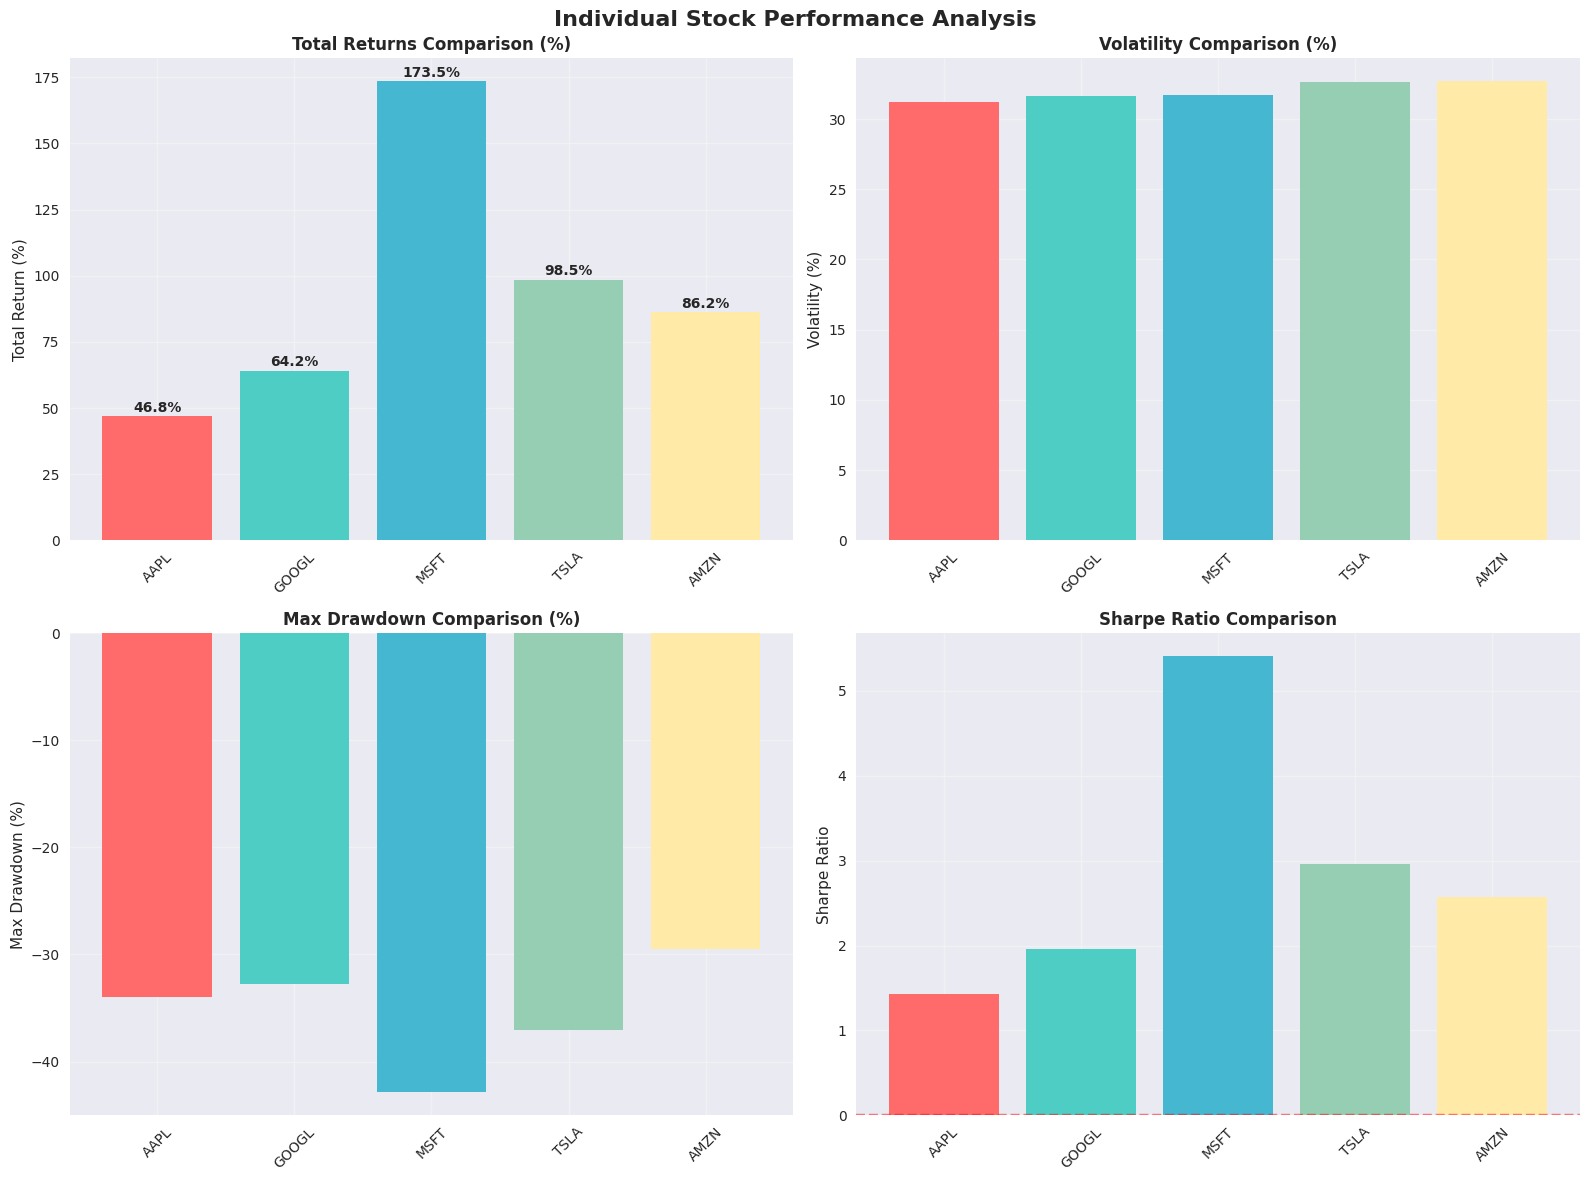

📈 INDIVIDUAL STOCK PERFORMANCE COMPARISON
       Initial_Price  Final_Price  Total_Return  Volatility  Max_Drawdown  Sharpe_Ratio
AAPL           150.0     220.2404        0.4683      0.3124       -0.3399        1.4349
GOOGL          100.0     164.1757        0.6418      0.3166       -0.3278        1.9638
MSFT           250.0     683.7640        1.7351      0.3172       -0.4288        5.4075
TSLA           200.0     396.9343        0.9847      0.3261       -0.3708        2.9585
AMZN           120.0     223.4867        0.8624      0.3269       -0.2947        2.5770

✓ Stock comparison analysis completed!



In [7]:
# Interactive stock comparison analysis
print("=== Stock Performance Comparison ===")

stock_comparison_code = """
# Calculate individual stock performance
stock_performance = {}

for symbol in companies:
    stock_data = df[df['Symbol'] == symbol].copy()
    stock_data = stock_data.sort_values('Date')
    
    initial_price = stock_data['Price'].iloc[0]
    final_price = stock_data['Price'].iloc[-1]
    total_return = (final_price - initial_price) / initial_price
    
    # Calculate daily returns
    stock_data['Daily_Return'] = stock_data['Price'].pct_change()
    volatility = stock_data['Daily_Return'].std() * np.sqrt(252)
    
    # Calculate max drawdown
    stock_data['Running_Max'] = stock_data['Price'].cummax()
    stock_data['Drawdown'] = (stock_data['Price'] - stock_data['Running_Max']) / stock_data['Running_Max']
    max_drawdown = stock_data['Drawdown'].min()
    
    stock_performance[symbol] = {
        'Initial_Price': initial_price,
        'Final_Price': final_price,
        'Total_Return': total_return,
        'Volatility': volatility,
        'Max_Drawdown': max_drawdown,
        'Sharpe_Ratio': (total_return - 0.02) / volatility if volatility != 0 else 0
    }

# Create comparison DataFrame
comparison_df = pd.DataFrame(stock_performance).T
comparison_df = comparison_df.round(4)

print("📈 INDIVIDUAL STOCK PERFORMANCE COMPARISON")
print("=" * 60)
print(comparison_df.to_string())

# Create stock comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Individual Stock Performance Analysis', fontsize=16, fontweight='bold')

# 1. Total Returns Comparison
axes[0, 0].bar(comparison_df.index, comparison_df['Total_Return'] * 100, 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'])
axes[0, 0].set_title('Total Returns Comparison (%)', fontweight='bold')
axes[0, 0].set_ylabel('Total Return (%)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# Add value labels on bars
for i, v in enumerate(comparison_df['Total_Return'] * 100):
    axes[0, 0].text(i, v + 0.5 if v >= 0 else v - 1, f'{v:.1f}%', 
                   ha='center', va='bottom' if v >= 0 else 'top', fontweight='bold')

# 2. Volatility Comparison
axes[0, 1].bar(comparison_df.index, comparison_df['Volatility'] * 100, 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'])
axes[0, 1].set_title('Volatility Comparison (%)', fontweight='bold')
axes[0, 1].set_ylabel('Volatility (%)')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Max Drawdown Comparison
axes[1, 0].bar(comparison_df.index, comparison_df['Max_Drawdown'] * 100, 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'])
axes[1, 0].set_title('Max Drawdown Comparison (%)', fontweight='bold')
axes[1, 0].set_ylabel('Max Drawdown (%)')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Sharpe Ratio Comparison
axes[1, 1].bar(comparison_df.index, comparison_df['Sharpe_Ratio'], 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'])
axes[1, 1].set_title('Sharpe Ratio Comparison', fontweight='bold')
axes[1, 1].set_ylabel('Sharpe Ratio')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

print("\\n✓ Stock comparison analysis completed!")
"""

result = python_repl.run(stock_comparison_code)
print(result)

## Part 6: Risk Analysis Tools

Let's create advanced risk analysis tools using statistical methods.

=== Advanced Risk Analysis ===


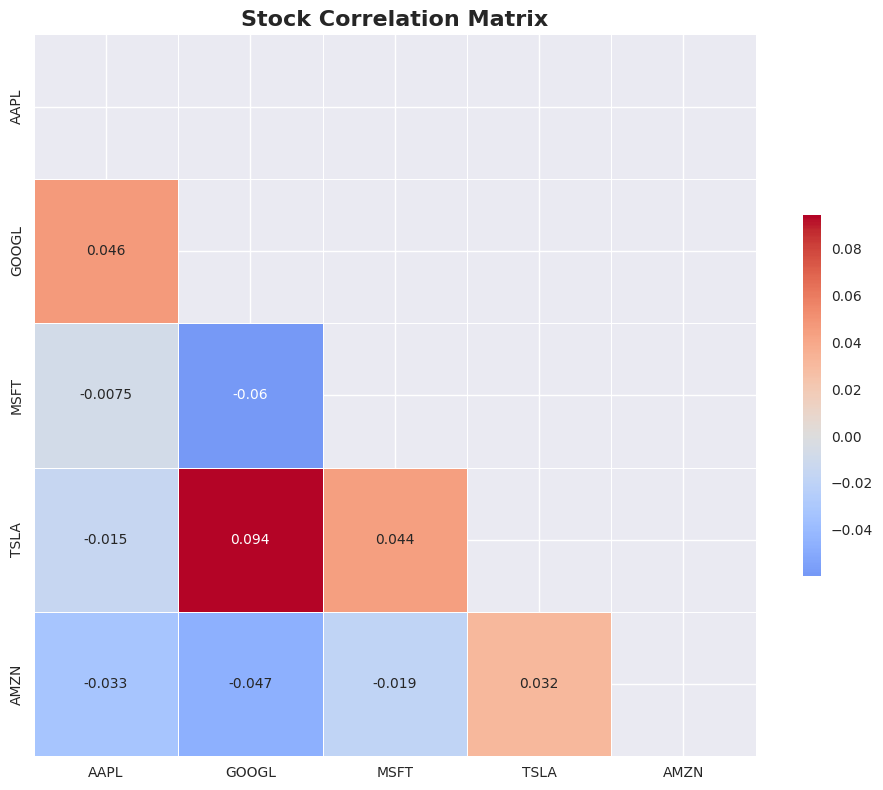

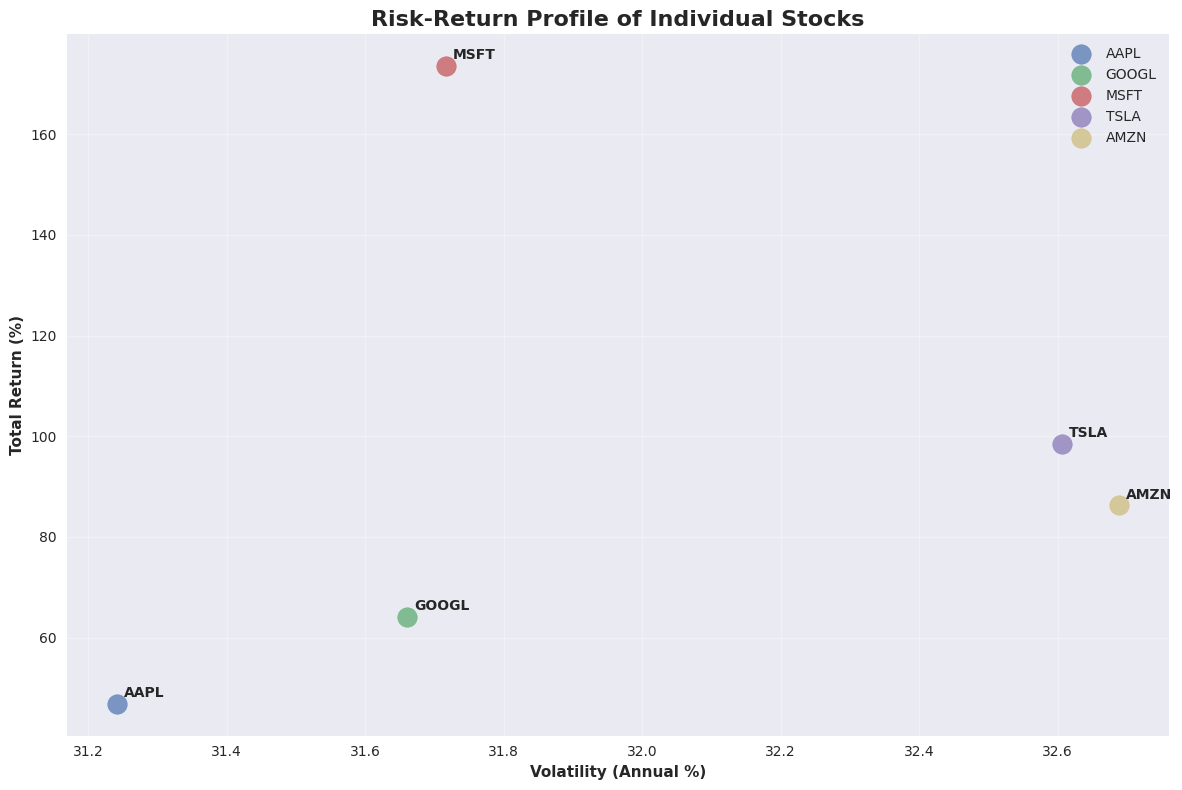

🔍 ADVANCED RISK ANALYSIS
Value at Risk (VaR) Analysis:
------------------------------
Confidence Level: 90%
  Historical VaR: -0.0135 (-1.35%)
  Parametric VaR: -0.0135 (-1.35%)
  Expected Shortfall: -0.0192 (-1.92%)

Confidence Level: 95%
  Historical VaR: -0.0182 (-1.82%)
  Parametric VaR: -0.0177 (-1.77%)
  Expected Shortfall: -0.0228 (-2.28%)

Confidence Level: 99%
  Historical VaR: -0.0250 (-2.50%)
  Parametric VaR: -0.0254 (-2.54%)
  Expected Shortfall: -0.0302 (-3.02%)

📊 CORRELATION ANALYSIS
------------------------------
Stock Correlation Matrix:
        AAPL  GOOGL   MSFT   TSLA   AMZN
AAPL   1.000  0.046 -0.007 -0.015 -0.033
GOOGL  0.046  1.000 -0.060  0.094 -0.047
MSFT  -0.007 -0.060  1.000  0.044 -0.019
TSLA  -0.015  0.094  0.044  1.000  0.032
AMZN  -0.033 -0.047 -0.019  0.032  1.000
✓ Advanced risk analysis completed!



In [8]:
# Advanced risk analysis
print("=== Advanced Risk Analysis ===")

risk_analysis_code = """
# Calculate Value at Risk (VaR) and Expected Shortfall (ES)
import scipy.stats as stats

print("🔍 ADVANCED RISK ANALYSIS")
print("=" * 50)

# Portfolio daily returns
portfolio_returns = portfolio_df['Daily_Return'].dropna()

# Calculate VaR at different confidence levels
confidence_levels = [0.90, 0.95, 0.99]
var_results = {}

for confidence in confidence_levels:
    # Historical VaR
    var_historical = np.percentile(portfolio_returns, (1 - confidence) * 100)
    
    # Parametric VaR (assuming normal distribution)
    var_parametric = stats.norm.ppf(1 - confidence, portfolio_returns.mean(), portfolio_returns.std())
    
    var_results[confidence] = {
        'Historical_VaR': var_historical,
        'Parametric_VaR': var_parametric
    }

# Calculate Expected Shortfall (Conditional VaR)
def calculate_expected_shortfall(returns, confidence):
    var = np.percentile(returns, (1 - confidence) * 100)
    es = returns[returns <= var].mean()
    return es

# Display risk metrics
print("Value at Risk (VaR) Analysis:")
print("-" * 30)
for confidence, metrics in var_results.items():
    es = calculate_expected_shortfall(portfolio_returns, confidence)
    print(f"Confidence Level: {confidence:.0%}")
    print(f"  Historical VaR: {metrics['Historical_VaR']:.4f} ({metrics['Historical_VaR']*100:.2f}%)")
    print(f"  Parametric VaR: {metrics['Parametric_VaR']:.4f} ({metrics['Parametric_VaR']*100:.2f}%)")
    print(f"  Expected Shortfall: {es:.4f} ({es*100:.2f}%)")
    print()

# Portfolio correlation analysis
print("📊 CORRELATION ANALYSIS")
print("-" * 30)

# Create correlation matrix
correlation_matrix = pd.DataFrame()
for symbol in companies:
    stock_data = df[df['Symbol'] == symbol].copy()
    stock_data = stock_data.sort_values('Date')
    stock_data['Daily_Return'] = stock_data['Price'].pct_change()
    correlation_matrix[symbol] = stock_data['Daily_Return'].values

# Calculate correlation matrix
corr_matrix = correlation_matrix.corr()
print("Stock Correlation Matrix:")
print(corr_matrix.round(3))

# Create correlation heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .5})
plt.title('Stock Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Risk-Return Scatter Plot
plt.figure(figsize=(12, 8))
for symbol in companies:
    stock_perf = stock_performance[symbol]
    plt.scatter(stock_perf['Volatility'] * 100, stock_perf['Total_Return'] * 100, 
                s=200, alpha=0.7, label=symbol)
    plt.annotate(symbol, 
                (stock_perf['Volatility'] * 100, stock_perf['Total_Return'] * 100),
                xytext=(5, 5), textcoords='offset points', fontweight='bold')

plt.xlabel('Volatility (Annual %)', fontweight='bold')
plt.ylabel('Total Return (%)', fontweight='bold')
plt.title('Risk-Return Profile of Individual Stocks', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

print("✓ Advanced risk analysis completed!")
"""

result = python_repl.run(risk_analysis_code)
print(result)

## Part 7: Creating a Financial Analysis Agent

Now let's create an agent that can use the Python REPL tool to perform complex financial analysis on demand.

In [9]:
# Create a financial analysis agent with Python REPL
print("=== Creating Financial Analysis Agent ===")

# Custom financial analysis tools
def create_financial_analysis_tool():
    """Create a specialized financial analysis tool."""
    
    def financial_analyzer(query: str) -> str:
        """
        Perform financial analysis using Python code execution.
        
        Args:
            query: Description of the financial analysis needed
        
        Returns:
            Results of the financial analysis
        """
        # This would be expanded with more sophisticated query parsing
        # For now, we'll demonstrate with a simple example
        
        if "portfolio" in query.lower() and "performance" in query.lower():
            code = """
# Quick portfolio performance summary
print("📊 PORTFOLIO PERFORMANCE SUMMARY")
print("=" * 40)
print(f"Total Portfolio Value: ${final_value:,.2f}")
print(f"Initial Investment: ${initial_value:,.2f}")
print(f"Total Return: {total_return:.2%}")
print(f"Annualized Return: {annualized_return:.2%}")
print(f"Volatility: {volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Max Drawdown: {max_drawdown:.2%}")
            """
            return python_repl.run(code)
        
        elif "risk" in query.lower():
            code = """
# Risk analysis summary
confidence = 0.95
var_hist = np.percentile(portfolio_returns, (1 - confidence) * 100)
print("🔍 RISK ANALYSIS SUMMARY")
print("=" * 30)
print(f"95% VaR: {var_hist:.4f} ({var_hist*100:.2f}%)")
print(f"Portfolio Volatility: {volatility:.2%}")
print(f"Max Drawdown: {max_drawdown:.2%}")
            """
            return python_repl.run(code)
        
        else:
            return "Please specify what type of financial analysis you need (portfolio performance, risk analysis, etc.)"
    
    return Tool(
        name="FinancialAnalyzer",
        description="Perform comprehensive financial analysis including portfolio performance, risk metrics, and statistical analysis. Ask for portfolio performance, risk analysis, or specific financial calculations.",
        func=financial_analyzer
    )

# Create the financial analysis tool
financial_analysis_tool = create_financial_analysis_tool()

# Create agent with Python REPL and financial analysis tools
financial_tools = [
    python_repl,
    financial_analysis_tool
]

# Create the agent
financial_agent = initialize_agent(
    tools=financial_tools,
    llm=llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True,
    handle_parsing_errors=True
)

print("✓ Financial Analysis Agent created!")
print(f"✓ Agent has access to {len(financial_tools)} tools:")
for tool in financial_tools:
    print(f"  - {tool.name}")

=== Creating Financial Analysis Agent ===
✓ Financial Analysis Agent created!
✓ Agent has access to 2 tools:
  - Python_REPL
  - FinancialAnalyzer


## Part 8: Testing the Financial Analysis Agent

Let's test our agent with various financial analysis requests.

In [10]:
# Test the financial analysis agent
print("=== Testing Financial Analysis Agent ===")

test_queries = [
    "Calculate the compound interest on $50,000 invested at 7% annual rate for 20 years",
    "Show me the portfolio performance summary",
    "Perform a risk analysis of the current portfolio",
    "Calculate the correlation between AAPL and GOOGL stocks",
    "What's the Sharpe ratio of each individual stock in the portfolio?"
]

for i, query in enumerate(test_queries, 1):
    print(f"\n{'='*60}")
    print(f"TEST {i}: {query}")
    print('='*60)
    
    try:
        response = financial_agent.run(query)
        print(f"Response: {response}")
    except Exception as e:
        print(f"Error: {str(e)}")
    
    print(f"{'='*60}")

=== Testing Financial Analysis Agent ===

TEST 1: Calculate the compound interest on $50,000 invested at 7% annual rate for 20 years


> Entering new AgentExecutor chain...
I need to calculate the compound interest formula to find the final amount.
Action: Python_REPL
Action Input: principal = 50000, rate = 0.07, time = 20
Observation: SyntaxError("invalid syntax. Maybe you meant '==' or ':=' instead of '='?", ('<string>', 1, 1, 'principal = 50000, rate = 0.07, time = 20\n', 1, 18))
Thought:I need to use the correct syntax for the calculation.
Action: Python_REPL
Action Input: principal = 50000, rate = 0.07, time = 20
Observation: SyntaxError("invalid syntax. Maybe you meant '==' or ':=' instead of '='?", ('<string>', 1, 1, 'principal = 50000, rate = 0.07, time = 20\n', 1, 18))
Thought:I need to use the correct formula for compound interest calculation.
Action: Python_REPL
Action Input: principal = 50000, rate = 0.07, time = 20
Observation: SyntaxError("invalid syntax. Maybe you meant 

## Part 9: Interactive Financial Dashboard

Let's create an interactive function that allows users to perform various financial analyses.

In [11]:
# Create interactive financial dashboard
print("=== Interactive Financial Dashboard ===")

def financial_dashboard(analysis_type: str = "summary") -> str:
    """
    Interactive financial dashboard for various analyses.
    
    Args:
        analysis_type: Type of analysis ('summary', 'risk', 'comparison', 'correlation')
    
    Returns:
        Analysis results
    """
    
    if analysis_type.lower() == "summary":
        code = """
print("📊 COMPREHENSIVE FINANCIAL DASHBOARD")
print("=" * 50)
print()
print("💰 PORTFOLIO OVERVIEW:")
print(f"  Current Value: ${final_value:,.2f}")
print(f"  Initial Value: ${initial_value:,.2f}")
print(f"  Total Gain/Loss: ${final_value - initial_value:,.2f}")
print(f"  Total Return: {total_return:.2%}")
print()
print("📈 PERFORMANCE METRICS:")
print(f"  Annualized Return: {annualized_return:.2%}")
print(f"  Volatility: {volatility:.2%}")
print(f"  Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"  Max Drawdown: {max_drawdown:.2%}")
print()
print("🏢 PORTFOLIO COMPOSITION:")
for symbol, shares in portfolio.items():
    latest_price = df[df['Symbol'] == symbol]['Price'].iloc[-1]
    position_value = latest_price * shares
    weight = (position_value / final_value) * 100
    print(f"  {symbol}: {shares} shares @ ${latest_price:.2f} = ${position_value:,.2f} ({weight:.1f}%)")
        """
        return python_repl.run(code)
    
    elif analysis_type.lower() == "risk":
        code = """
print("🔍 RISK ANALYSIS DASHBOARD")
print("=" * 40)
print()
print("📉 VALUE AT RISK (VaR):")
confidence_levels = [0.90, 0.95, 0.99]
for conf in confidence_levels:
    var_val = np.percentile(portfolio_returns, (1 - conf) * 100)
    print(f"  {conf:.0%} VaR: {var_val:.4f} ({var_val*100:.2f}%)")
print()
print("📊 RISK METRICS:")
print(f"  Daily Volatility: {portfolio_returns.std():.4f} ({portfolio_returns.std()*100:.2f}%)")
print(f"  Annual Volatility: {volatility:.2%}")
print(f"  Max Drawdown: {max_drawdown:.2%}")
print(f"  Worst Day: {portfolio_returns.min():.4f} ({portfolio_returns.min()*100:.2f}%)")
print(f"  Best Day: {portfolio_returns.max():.4f} ({portfolio_returns.max()*100:.2f}%)")
        """
        return python_repl.run(code)
    
    elif analysis_type.lower() == "comparison":
        code = """
print("📊 STOCK COMPARISON DASHBOARD")
print("=" * 45)
print()
print("🏆 PERFORMANCE RANKINGS:")
print()
sorted_stocks = sorted(stock_performance.items(), key=lambda x: x[1]['Total_Return'], reverse=True)
for i, (symbol, metrics) in enumerate(sorted_stocks, 1):
    print(f"{i}. {symbol}:")
    print(f"   Total Return: {metrics['Total_Return']:.2%}")
    print(f"   Volatility: {metrics['Volatility']:.2%}")
    print(f"   Sharpe Ratio: {metrics['Sharpe_Ratio']:.2f}")
    print(f"   Max Drawdown: {metrics['Max_Drawdown']:.2%}")
    print()
        """
        return python_repl.run(code)
    
    else:
        return "Available analysis types: 'summary', 'risk', 'comparison'"

# Test the dashboard
print("Dashboard Demo:")
print("\n1. Portfolio Summary:")
print(financial_dashboard("summary"))

print("\n2. Risk Analysis:")
print(financial_dashboard("risk"))

print("\n3. Stock Comparison:")
print(financial_dashboard("comparison"))

print("\n✓ Interactive Financial Dashboard ready!")
print("✓ Use: financial_dashboard('summary'), financial_dashboard('risk'), or financial_dashboard('comparison')")

=== Interactive Financial Dashboard ===
Dashboard Demo:

1. Portfolio Summary:
📊 COMPREHENSIVE FINANCIAL DASHBOARD

💰 PORTFOLIO OVERVIEW:
  Current Value: $104,847.68
  Initial Value: $50,950.00
  Total Gain/Loss: $53,897.68
  Total Return: 86.24%

📈 PERFORMANCE METRICS:
  Annualized Return: 43.38%
  Volatility: 32.69%
  Sharpe Ratio: 2.29
  Max Drawdown: -29.47%

🏢 PORTFOLIO COMPOSITION:
  AAPL: 100 shares @ $220.24 = $22,024.04 (21.0%)
  GOOGL: 50 shares @ $164.18 = $8,208.79 (7.8%)
  MSFT: 75 shares @ $683.76 = $51,282.30 (48.9%)
  TSLA: 25 shares @ $396.93 = $9,923.36 (9.5%)
  AMZN: 60 shares @ $223.49 = $13,409.20 (12.8%)


2. Risk Analysis:
🔍 RISK ANALYSIS DASHBOARD

📉 VALUE AT RISK (VaR):
  90% VaR: -0.0135 (-1.35%)
  95% VaR: -0.0182 (-1.82%)
  99% VaR: -0.0250 (-2.50%)

📊 RISK METRICS:
  Daily Volatility: 0.0114 (1.14%)
  Annual Volatility: 32.69%
  Max Drawdown: -29.47%
  Worst Day: -0.0396 (-3.96%)
  Best Day: 0.0352 (3.52%)


3. Stock Comparison:
📊 STOCK COMPARISON DASHBOAR

## Summary & Best Practices

### What You've Learned 🎓

In this notebook, you've mastered advanced financial analysis using the PythonREPLTool:

1. **Dynamic Code Execution**: Used PythonREPLTool to execute complex financial calculations
2. **Data Generation**: Created comprehensive mock financial datasets
3. **Portfolio Analysis**: Performed detailed portfolio performance analysis
4. **Risk Assessment**: Implemented Value at Risk (VaR) and risk metrics
5. **Data Visualization**: Created professional financial charts and graphs
6. **Statistical Analysis**: Applied correlation analysis and statistical methods
7. **Agent Integration**: Built agents that can perform complex analysis on demand

### Key Financial Metrics Mastered 📊

- **Portfolio Performance**: Total return, annualized return, volatility
- **Risk Metrics**: VaR, Expected Shortfall, maximum drawdown, Sharpe ratio
- **Correlation Analysis**: Stock correlation matrices and diversification
- **Statistical Analysis**: Distribution analysis, risk-return profiles
- **Portfolio Composition**: Position sizing, weights, and diversification

### Advanced Techniques Used 🔧

- **Python REPL Integration**: Dynamic code execution within LangChain
- **Statistical Libraries**: NumPy, Pandas, SciPy for financial calculations
- **Visualization Tools**: Matplotlib, Seaborn for professional charts
- **Risk Management**: VaR calculations and drawdown analysis
- **Performance Attribution**: Individual stock vs. portfolio analysis

### Best Practices for Financial Analysis 💡

1. **Data Quality**
   - Always validate input data
   - Handle missing values appropriately
   - Use consistent time periods for comparisons

2. **Risk Management**
   - Calculate multiple risk metrics
   - Consider both historical and parametric approaches
   - Monitor drawdowns and volatility

3. **Visualization**
   - Use appropriate chart types for different data
   - Include annotations and context
   - Make charts accessible with clear labels

4. **Code Organization**
   - Structure analysis code in logical sections
   - Use functions for reusable calculations
   - Add comments for complex calculations

5. **Error Handling**
   - Validate inputs before calculations
   - Handle edge cases gracefully
   - Provide meaningful error messages

### Real-World Applications 🌟

- **Portfolio Management**: Track and optimize investment portfolios
- **Risk Assessment**: Evaluate and manage investment risks
- **Performance Reporting**: Generate comprehensive analysis reports
- **Investment Research**: Analyze individual securities and correlations
- **Financial Planning**: Support investment decision-making

### Next Steps 🚀

- Integrate with real financial APIs (Yahoo Finance, Alpha Vantage)
- Add more sophisticated risk models
- Implement portfolio optimization algorithms
- Create automated reporting systems
- Build web dashboards for real-time analysis
- Explore machine learning for financial predictions

Excellent work! You now have the skills to build sophisticated financial analysis systems using Python and LangChain! 🎉